# Linear SVM From Scratch

`NOTE:` This is a from-scratch, gradient-descent approximation of a linear SVM. It captures the core ideas (margins, hinge loss) but is not the exact quadratic-programming SVM solver.

Training Accuracy: 1.0
Weights: [1.0300158  0.88899913]
Bias: -0.009999999999999997


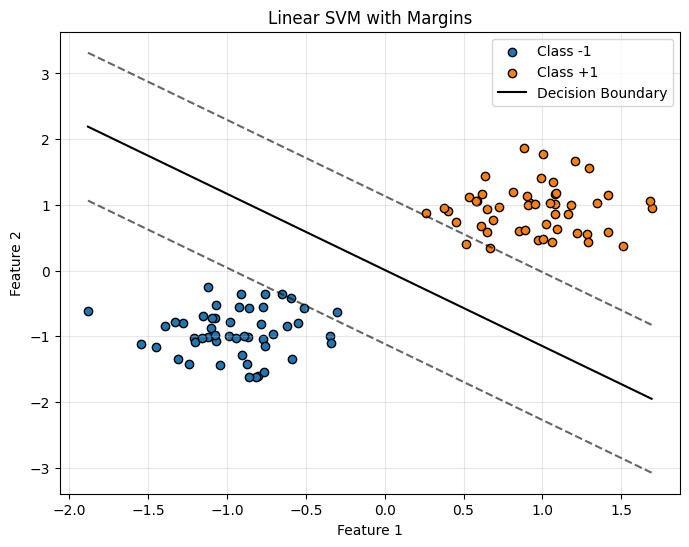

In [16]:
import numpy as np
import matplotlib.pyplot as plt


# Data
np.random.seed(42)
X1 = np.random.randn(50, 2) + [0, 0]
X2 = np.random.randn(50, 2) + [5, 5]

X = np.vstack((X1, X2))
y = np.array([-1]*50 + [1]*50)

# Normalize
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Linear SVM (GD approximation)
class LinearSVM:
    def __init__(self, lr=0.01, lambda_param=0.01, epochs=3000):
        self.lr = lr
        self.lambda_param = lambda_param
        self.epochs = epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.random.randn(n_features)
        self.b = 0.0

        for _ in range(self.epochs):
            indices = np.random.permutation(n_samples)

            for i in indices:
                x_i = X[i]
                y_i = y[i]

                margin = y_i * (np.dot(x_i, self.w) + self.b)

                if margin >= 1:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - y_i * x_i)
                    self.b += self.lr * y_i

    def predict(self, X):
        scores = np.dot(X, self.w) + self.b
        return np.where(scores >= 0, 1, -1)
    
# Train
svm = LinearSVM()
svm.fit(X, y)

preds = svm.predict(X)
accuracy = (preds == y).mean()

print("Training Accuracy:", accuracy)
print("Weights:", svm.w)
print("Bias:", svm.b)

# Linear SVM Visualization

def plot_linear_svm(X, y, model):
    plt.figure(figsize=(8,6))
    plt.scatter(X[y==-1][:,0], X[y==-1][:,1], label="Class -1", edgecolor="k")
    plt.scatter(X[y==1][:,0], X[y==1][:,1], label="Class +1", edgecolor="k")

    x_vals = np.linspace(X[:,0].min(), X[:,0].max(), 100)
    y_vals = -(model.w[0]*x_vals + model.b) / model.w[1]
    margin1 = -(model.w[0]*x_vals + model.b - 1) / model.w[1]
    margin2 = -(model.w[0]*x_vals + model.b + 1) / model.w[1]

    plt.plot(x_vals, y_vals, "k-", label="Decision Boundary")
    plt.plot(x_vals, margin1, "k--", alpha=0.6)
    plt.plot(x_vals, margin2, "k--", alpha=0.6)

    plt.legend()
    plt.grid(alpha=0.3)
    plt.title("Linear SVM with Margins")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_linear_svm(X, y, svm)


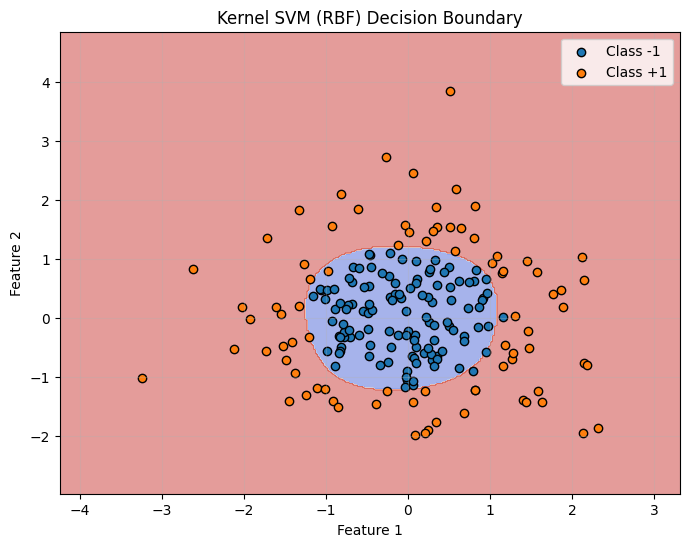

In [ ]:
# Generate non-linear data

np.random.seed(42)
X = np.random.randn(200, 2)
y = np.where(X[:,0]**2 + X[:,1]**2 > 1.5, 1, -1)

# RBF Kernel

def rbf_kernel(x1, x2, gamma=0.5):
    return np.exp(-gamma * np.linalg.norm(x1 - x2)**2)


# Simple Kernel SVM (Perceptron-style)

alpha = np.zeros(len(X))

epochs = 10
gamma = 0.5

for _ in range(epochs):
    for i in range(len(X)):
        decision = sum(alpha[j] * y[j] * rbf_kernel(X[j], X[i], gamma)
                       for j in range(len(X)))
        if y[i] * decision <= 0:
            alpha[i] += 1


# Kernel Decision Function

def kernel_predict(x):
    return np.sign(sum(alpha[j] * y[j] * rbf_kernel(X[j], x, gamma)
                       for j in range(len(X))))


# Kernel SVM Visualization

def plot_kernel_svm(X, y):
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )
    grid = np.c_[xx.ravel(), yy.ravel()]

    Z = np.array([kernel_predict(p) for p in grid])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, cmap="coolwarm", alpha=0.5)
    plt.scatter(X[y==-1][:,0], X[y==-1][:,1], edgecolor="k", label="Class -1")
    plt.scatter(X[y==1][:,0], X[y==1][:,1], edgecolor="k", label="Class +1")

    plt.title("Kernel SVM (RBF) Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

plot_kernel_svm(X, y)